In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def sigma(z):
    return  1.0/(1.0 + np.exp(-z))


def sigma_derivative(z):
    return sigma(z)*(1.0 - sigma(z))

In [9]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # 2 is from input to hidden
        self.w2 = np.random.randn(2,2) # hidden_nodes, input nodes
        self.b2 = np.random.randn(2,1) # always just a one matrix
        
        # 3 is from hidden to output
        self.w3 = np.random.randn(1,2) # output, hidden
        self.b3 = np.random.randn(1,1) 
        

    # Is going through all the matrix feedforward does all inputs in one epoch backwards too
    def feed_forward(self, input_layer): 
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigma(self.w2.dot(input_layer) + self.b2) # a2s is hidden output
        a3s = sigma(self.w3.dot(a2s) + self.b3) # a3s is output of output
        return a3s

    
    def back_propagation(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):  
            # xs is the input data set
            # ys is the output data set
            # x is single input
            # y is single output
            # a1 is reshaped input
            
            a1 = x.reshape(2,1) # convert input 1, 2 vector x, convert into (2,1) column vector, transposing
            # must reshape y = y.reshape(ys, 1)
            # feed forward
            
            z2 = self.w2.dot(a1) + self.b2 # so will z2 and a2 (multiply input by the weights plus bias)
            a2 = sigma(z2) # column vector shape (2,1) # you need z2, # hidden layer output
            z3 = self.w3.dot(a2) + self.b3 # a simple number in a (1,1) column vector
            a3 = sigma(z3) # so is output layer output
            # ----
            
            # error term from output to hidden
            delta3 = (a3-y) * sigma_derivative(z3) # delta3.shape is (1,1) # sigmoid reverses the movement of the activation
            
            # hidden to input
            delta2 = sigma_derivative(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            
            # summ up all the error terms for any single input
            del_b3 += delta3 # summing bias (output)
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2 # summing bias on hidden
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
            # cost function, change the cost function here
            cost += ((a3 - y)**2).sum() 
            # do cross entropy cost function
        
        n = len(ys)  # number of training vectors           
        # get the average change per training input (change in value)
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def predict(self, final_output):
        for x in final_output:
            if x > 0.5:
                print(1)
            else:
                print(0)
        
    
    def train(self, epochs, eta):
        # eta is learning rate
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.back_propagation(xs,ys)

            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost

[[0.13441229 0.10816814 0.14522425 0.12453942]]
[[0.08467026 0.91859922 0.91853706 0.08963025]]


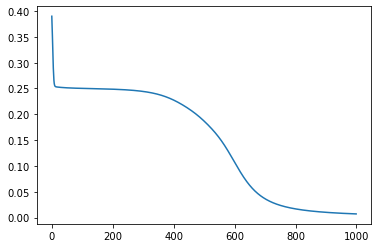

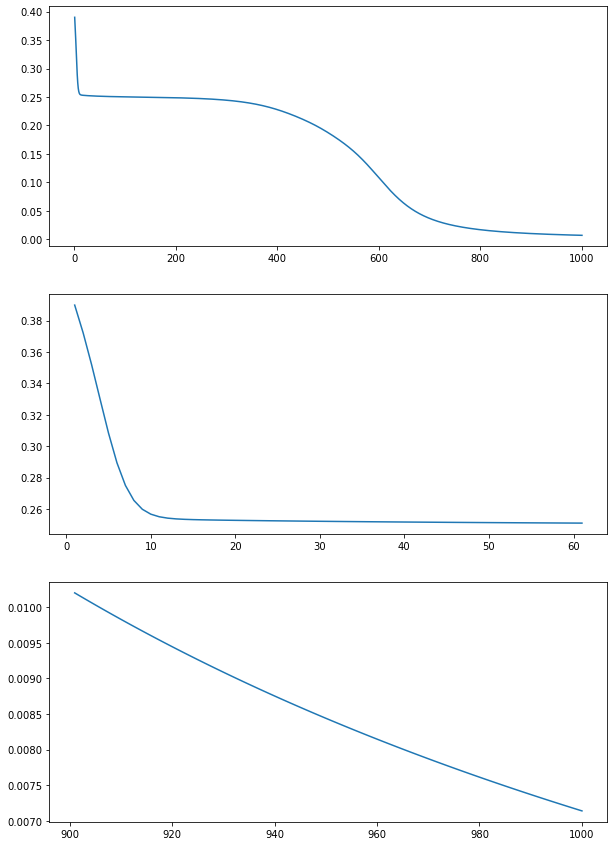

In [10]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feed_forward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feed_forward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])


#3 use max of all the 3 outputs from the array